In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalizing

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#compiling

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#training

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2604 - accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0736 - accuracy: 0.9771


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0921 - accuracy: 0.9706
0.09213805198669434 0.9706000089645386


In [3]:
print(len(x_train))

60000


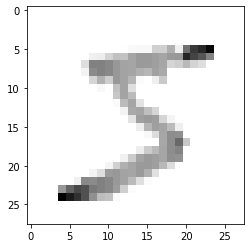

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [5]:
#save the model

model.save('epic_num_reader_model')

INFO:tensorflow:Assets written to: epic_num_reader_model\assets


In [6]:
#calling the model

new_model = tf.keras.models.load_model('epic_num_reader_model')

In [7]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


In [8]:
print(predictions)

[[3.31056249e-09 3.99198319e-09 1.55042926e-06 ... 9.99977231e-01
  2.33728343e-08 3.21809885e-08]
 [4.53809018e-10 1.01555306e-04 9.99888539e-01 ... 1.86568982e-09
  2.15068326e-07 2.10122510e-11]
 [3.66546232e-07 9.99130785e-01 2.46930897e-04 ... 1.07886510e-04
  4.78609290e-04 8.75427986e-07]
 ...
 [1.25829769e-09 5.96090672e-07 4.82238178e-08 ... 1.11837922e-04
  4.98804184e-06 7.95606291e-04]
 [4.54736219e-05 2.04147298e-07 1.96800599e-07 ... 3.15271632e-06
  8.36418651e-04 7.01095502e-08]
 [6.88283253e-09 5.51397461e-09 7.82014009e-09 ... 9.44362297e-12
  4.36060077e-08 1.29406694e-10]]


In [9]:
import numpy as np

print(np.argmax(predictions[843]))

4


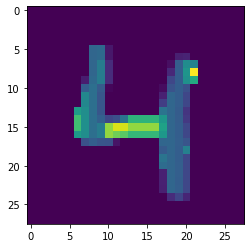

In [10]:
plt.imshow(x_test[843])